# Desafio 04: Construindo um modelo de Regressão para marketing
*link do Desafio: https://dncgroupbr.notion.site/Desafio-Construindo-um-modelo-de-Regress-o-para-marketing-1ac45e3d4ee8418a9b65ba6924be6af8*



**Tarefas a serem executadas**


1.   Análise Descritiva ✅
    
    a. Uso da função describe()

2.   Análise Exploratória ✅
    
    a. Relações e padrões relevantes, correlação e distribuição

    b. Uso do heatmap

3.   Modelagem ✅

    a. Treino e teste do modelo de Regressão  

4.   Calculando Predição ✅
    
    a. Calcule o coeficiente de determinação (r^2)

5.   Resultado ✅

    a. Plotar um gráfico com as 3 regressões usadas

    b. Função para predizer resultado com base no usuário

    c. Recebendo inputs do usuário






### Importando bibliotecas e upload do .csv ⏬

In [ ]:
# importing libraries of the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from google.colab import files

# uploading the necessary file
upload = files.upload()

Saving MKT.csv to MKT.csv


### Análise Descritiva ⏬


*   Identificamos que não existem valores nulos e todos são do tipo Float
através da funcão "df.info()"
*   Identificamos que não existem linhas duplicadas através da função "df.duplicated()"
*   Usamos a função "describe()" para descrever os dados do Dataframe
*   Usando o "describe()" vimos que não possuímos linhas com valores zerados



In [ ]:
# creating the dataframe to use
df = pd.read_csv("MKT.csv")

In [ ]:
df.head(50)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


In [ ]:
# Type of data and Null Values
# we don't have Null values
# all the variables are Float
print("Type of Data and Null Values:")
df.info()

Type of Data and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# see if we have duplicated rows
# we don't have duplicated rows
duplicates = df[df.duplicated()]
print("Duplicated rows:", duplicates)

Duplicated rows: Empty DataFrame
Columns: [youtube, facebook, newspaper, sales]
Index: []


In [ ]:
# describing the df
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### Análise Exploratória ⏬


*   Previamente com o "pairplot(df)" que 'youtube' está fortemente relacionado com sales enquanto o 'newspaper' está levemente relacionado
*   Confirmamos isso com ".corr()" que nos dá o coeficiente de correlação das variáveis
*   Com o "heatmap" plotado vimos de forma mais franca e visual a relação entre as variáveis



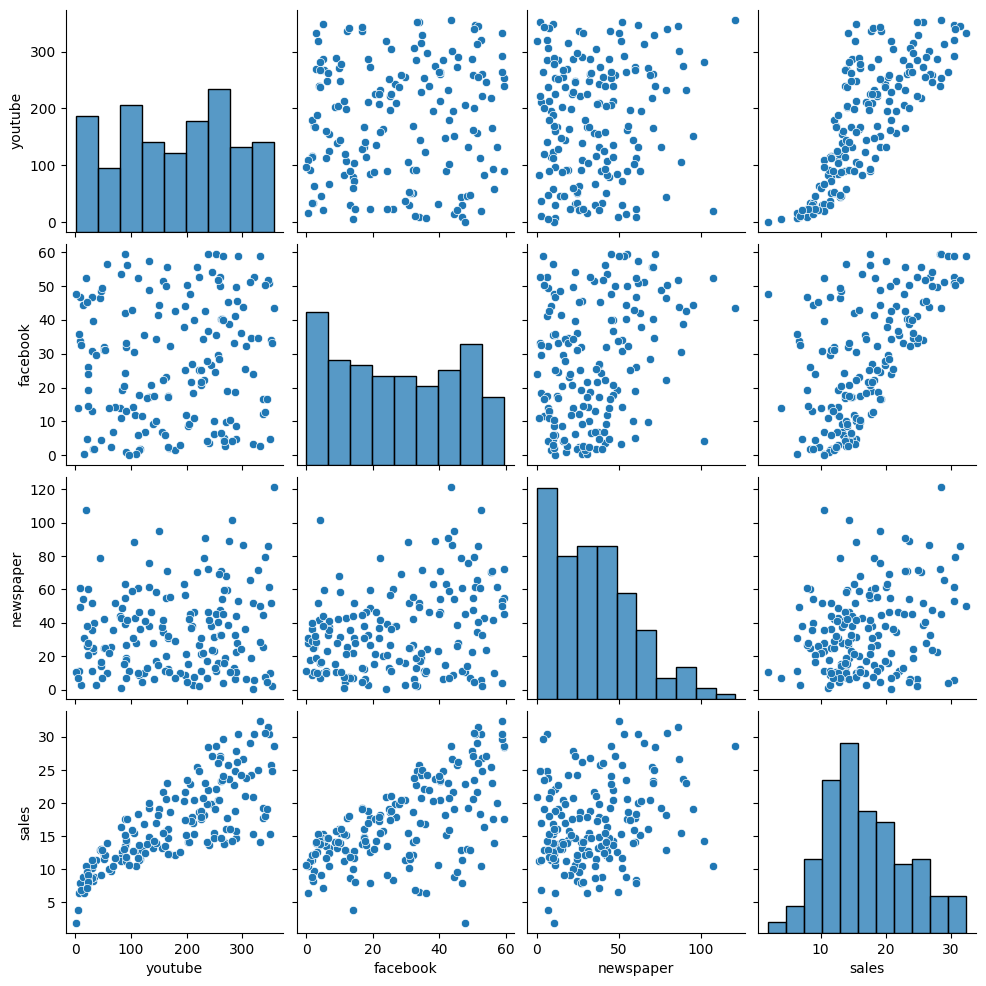

In [ ]:
# analyzing relationship between each pair of variables
sns.pairplot(df)
plt.show()

In [ ]:
# seing correlation of columns, how much it is related to each other
df_corr = df.corr()
df_corr

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


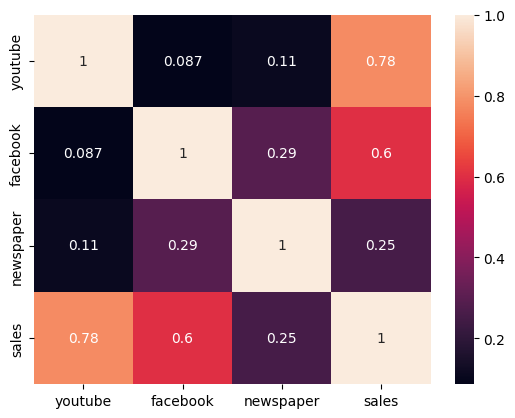

In [ ]:
# plotting a heatmap that better shows the correlation between variables
# founded previously
sns.heatmap(df_corr, annot=True)
plt.show()

### Modelando ⏬


*   Dividimos em X as colunas dos canais e y as vendas do mesmo para construir nosso df de teste e predição
*   Usamos o método "train_test_split" com tamanho do dataframe de teste relativo à 20% do original e "random_state=42"

In [ ]:
# Splitiing the DF into 2 variables to create our DF for training
X = df[['youtube', 'newspaper', 'facebook']]

y = df[['sales']]
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (171, 3)
y shape: (171, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predição ⏬


*   Testamos 3 tipos de Regressão Linear do SKLearn, *LinearRegression, SVR e XGBRegressor*
*   Seguimos o mesmo padrão para os 3, treino com o "fit()", predição com "predict()" e cálculo do R2 Score com a base prevista "r2_score()"
*   Vimos que o método de XGBoost foi o melhor e será mostrado isso na guia "Resultado"

REGRESSÃO LINEAR

In [ ]:
# training the model with .fit
regLinear = LinearRegression().fit(X_train, y_train)

In [ ]:
# predict the results with .predict
yLinear = regLinear.predict(X_test)

In [ ]:
# finding the r2 score
rLinear = r2_score(y_test, yLinear)

In [ ]:
# printing the results for documentation purposes
print("R_quadrado RegLinear =",rLinear)

R_quadrado RegLinear = 0.8728630857012161


SVR

In [ ]:
# training the model with .fit
regSVR = SVR().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# predict the results with .predict
ySVR= regSVR.predict(X_test)

In [ ]:
# finding the r2 score
rSVR = r2_score(y_test, ySVR)

In [ ]:
# printing the results for documentation purposes
print("R_quadrado RegSVR = ",rSVR)

R_quadrado RegSVR =  0.8188712168501214


XGBoost

In [ ]:
# training the model with .fit
regXGB = XGBRegressor().fit(X_train, y_train)

In [ ]:
# predict the results with .predict
yXGB = regXGB.predict(X_test)

In [ ]:
# finding the r2 score
rXGB = r2_score(y_test, yXGB)

In [ ]:
# printing the results for documentation purposes
print("R_quadrado RegXGB = ",rXGB)

R_quadrado RegXGB =  0.9755634069442749


### Resultado ⏬

*   Plotamos os 3 resultados de Regressão em um gráfico para ilustrar o método que performou melhor
*   Criamos uma função que recebe a lista que o usuário digitou e prevê o resultado de vendas com o algoritmo XGBoost já treinado
*   Pegamos os valores dos investimentos do usuário e retornamos o valor previsto em sales


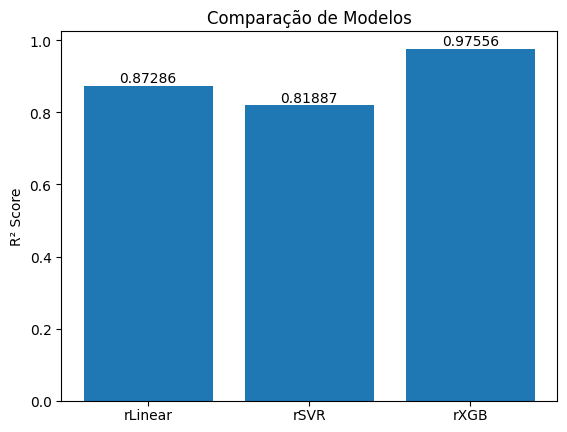

In [ ]:
# getting r2scores of all predictions models used
r2Values = [rLinear, rSVR, rXGB]

# setting the size of y as the same of the amount of models "3"
y_pos = np.arange(len(r2Values))

# List with variables names to plot in axis=1 (labels)
labels = ['rLinear', 'rSVR', 'rXGB']

# setting x as 3 (count of r2values) and height as values of r2Values
plt.bar(y_pos, r2Values)

# adding labels of variables below the bars
for i, label in enumerate(labels):
    plt.text(i, -0.05, label, ha='center')

# adding the values of R2 in each bar
for i, v in enumerate(r2Values):
    plt.text(i, v + 0.01, f"{v:.5f}", ha='center')

# title of Y axis
plt.ylabel('R² Score')

# title of how graphic
plt.title('Comparação de Modelos')
plt.show()

Predição do Usuário

In [ ]:
# function to pass list of values input by User
# returns a print with the "sales" predicted

def predict_results(list):
  data_predict = [values_user]
  data_predict = np.array(new_data, dtype=float)
  prediction = regXGB.predict(new_data),2
  print("Valor previsto em 'Sales': {:.2f}".format(prediction[0][0]))

In [ ]:
# getting the investment values from user
channels = ['youtube', 'facebook', 'newspaper']
values_user = []
for i in range(0, 3):
  channel_input = float(input("Informe o valor do investimento em " + channels[i] + ": "))
  values_user.append(channel_input)

predict_results(values_user)

Informe o valor do investimento em youtube: 100
Informe o valor do investimento em facebook: 100
Informe o valor do investimento em newspaper: 100
Valor previsto em 'Sales': 6.39
